In [1]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Arial Unicode MS')
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
import folium
import json
from glob import glob
import missingno as msno

In [2]:
# 불러오기
df = pd.read_csv('./datas/domestic_market_size.csv', thousands=',')
market_size_raw = pd.DataFrame(df)
market_size_raw.head()

,(코드)산업,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,(0001)전산업,"855,409,035",1.395750e+09,2.058129e+09,2.203890e+09,2.396508e+09,2.769841e+09,2.752651e+09,3.104104e+09,3.464008e+09,3.541314e+09,3.528272e+09,3.579923e+09,3.603501e+09,3.809136e+09,4.081292e+09,4.252328e+09
1,(0002)농림어업,"36,458,912",4.312989e+07,4.943280e+07,5.019919e+07,5.200098e+07,5.929421e+07,6.055228e+07,6.280154e+07,6.765416e+07,6.898858e+07,6.844612e+07,6.818887e+07,7.221898e+07,7.076652e+07,7.204786e+07,7.339943e+07
2,(0003)광업,"16,140,974",4.261716e+07,6.831587e+07,8.324459e+07,8.743566e+07,1.468055e+08,1.122243e+08,1.344409e+08,1.858221e+08,1.947890e+08,1.795889e+08,1.682904e+08,1.123865e+08,9.442764e+07,1.241617e+08,1.541998e+08
3,(0004)제조업,"405,402,030",6.154948e+08,8.805226e+08,9.348485e+08,1.028049e+09,1.225082e+09,1.186703e+09,1.393742e+09,1.608548e+09,1.605810e+09,1.556811e+09,1.559629e+09,1.432693e+09,1.490319e+09,1.591960e+09,1.631825e+09
4,(0005)전기가스수도,"15,066,111",3.150317e+07,4.642389e+07,5.128782e+07,5.522098e+07,6.507948e+07,6.480842e+07,7.583846e+07,8.533913e+07,9.927196e+07,1.057892e+08,1.084038e+08,9.463514e+07,9.361816e+07,9.636414e+07,1.037953e+08


<AxesSubplot:>

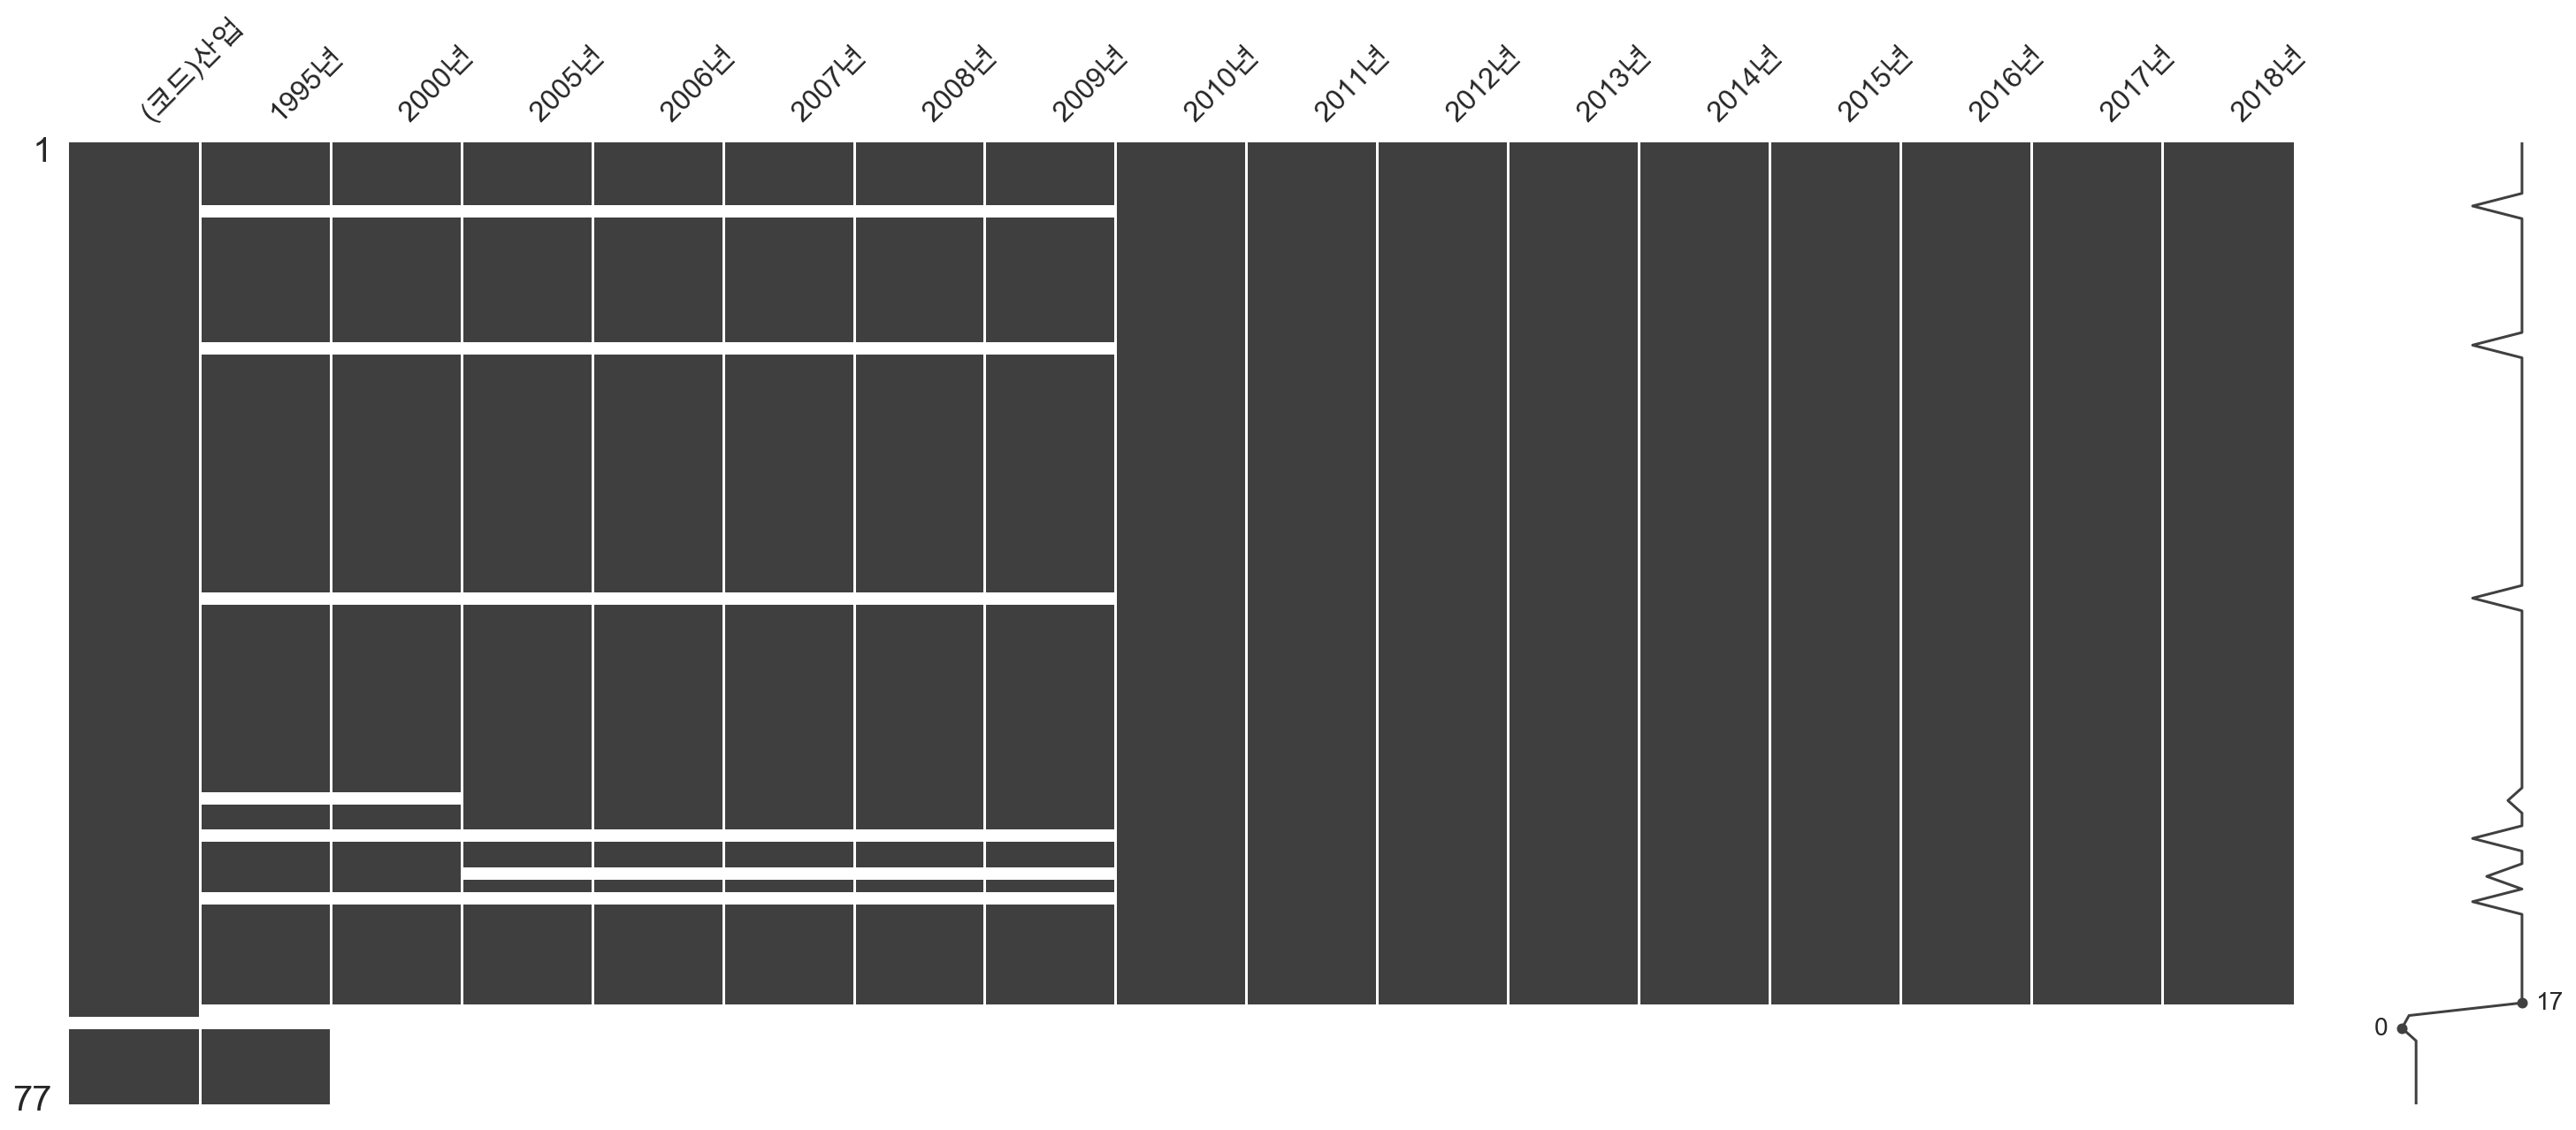

In [3]:
# NaN data 확인
msno.matrix(market_size_raw)

In [4]:
# NaN data = 0 입력
market_size_raw.fillna(value=0, inplace=True)

<AxesSubplot:>

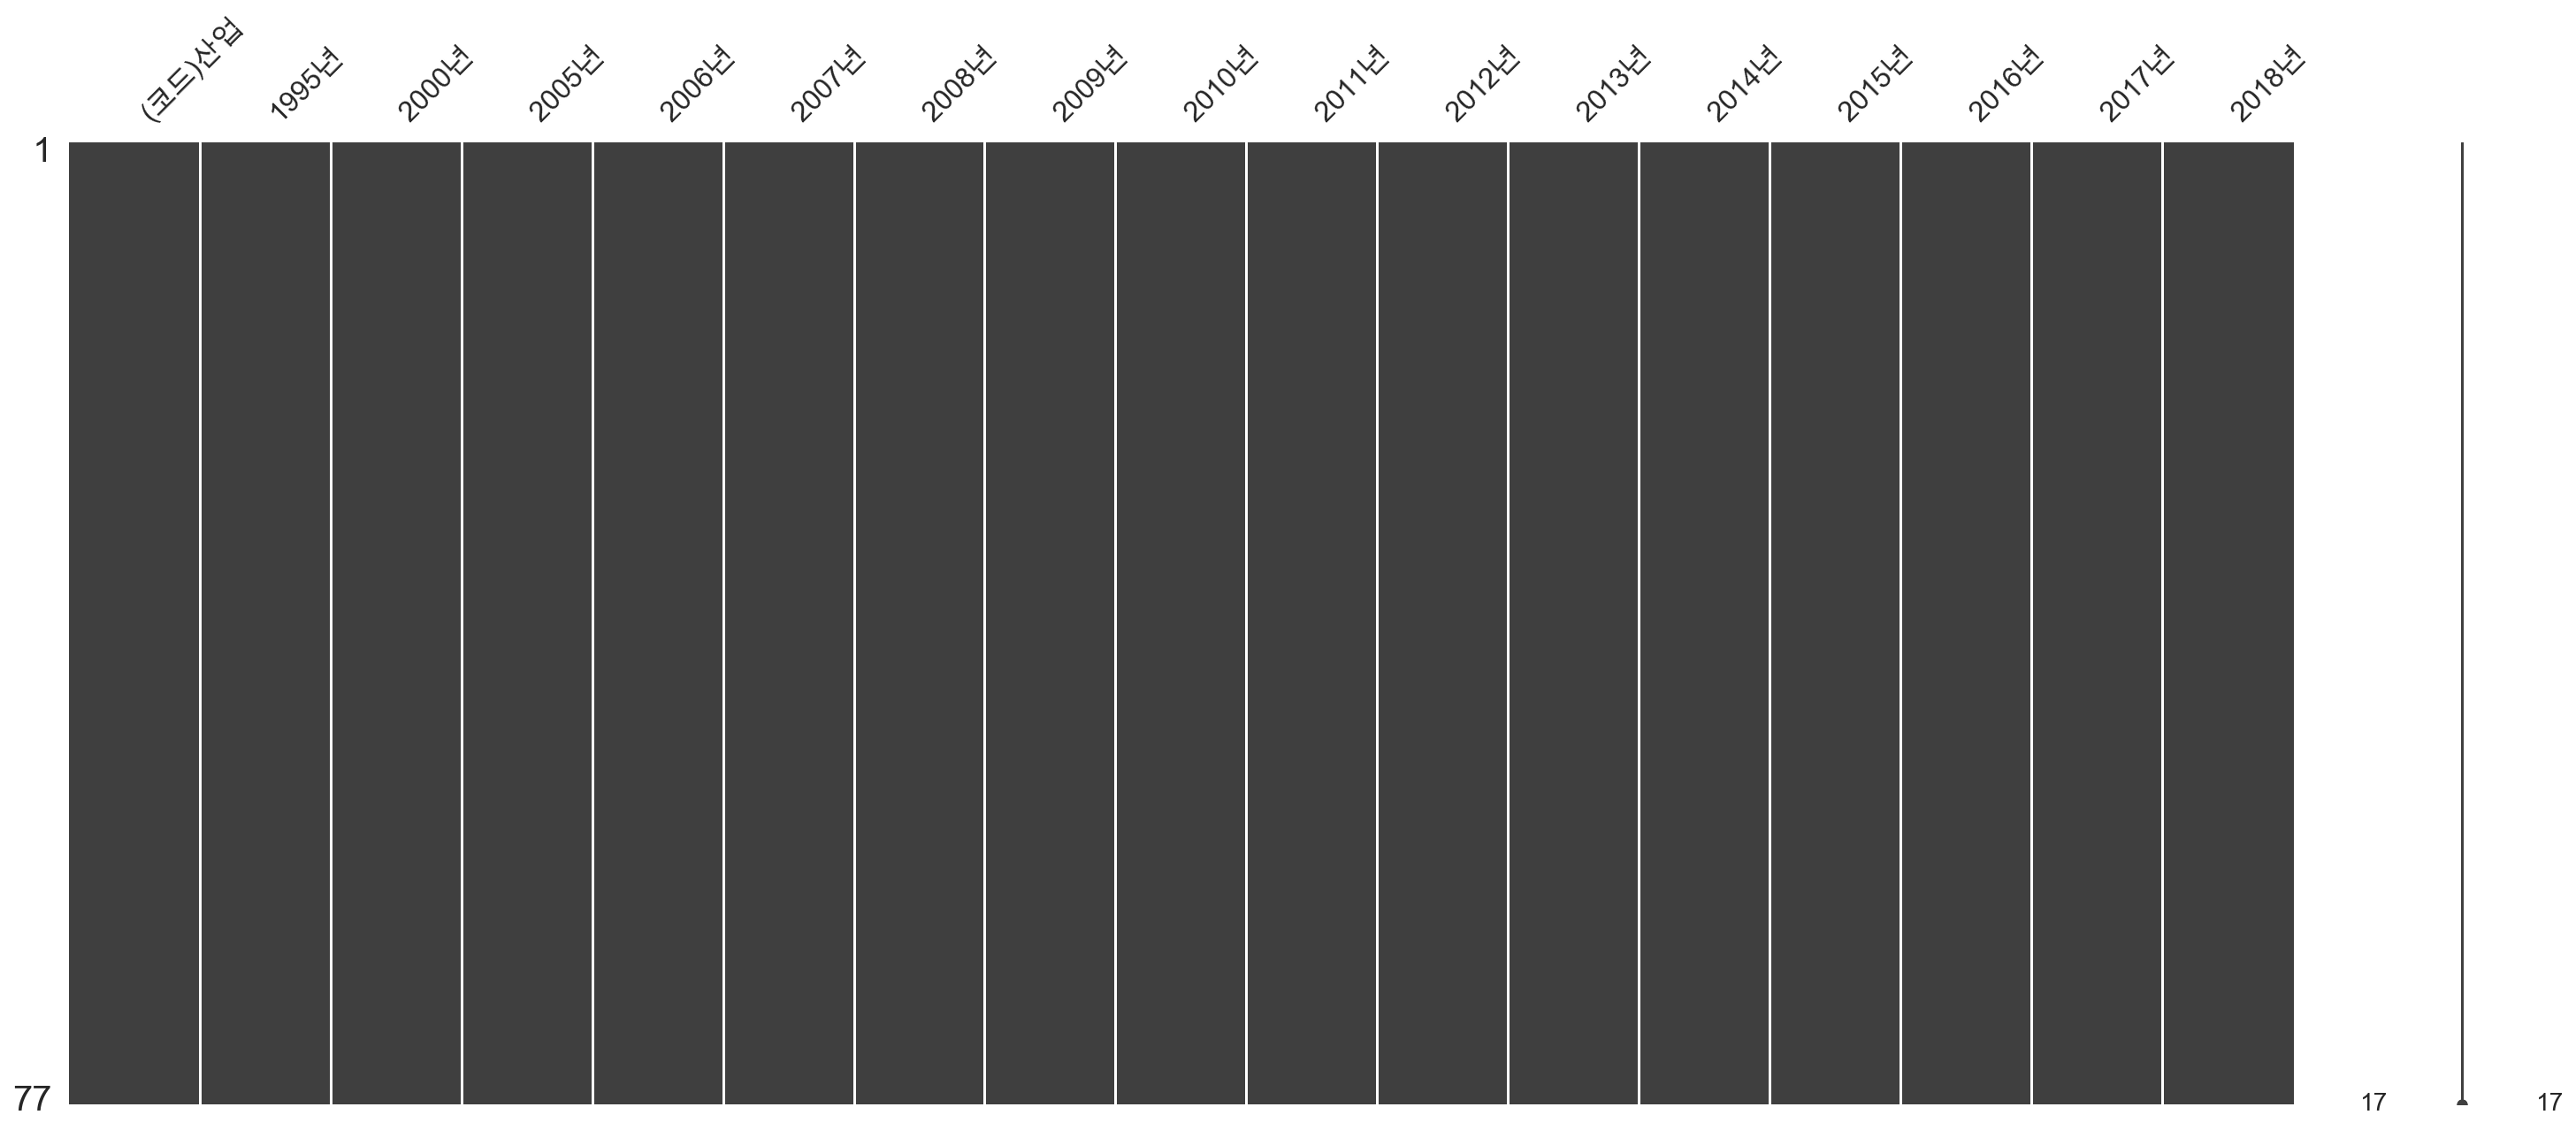

In [5]:
msno.matrix(market_size_raw)

In [6]:
market_size_raw.tail(10)

,(코드)산업,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년
67,(2402)예술·스포츠·여가,"5,917,011",11986951.0,25429607.0,27834302.0,32300938.0,31156089.0,31384365.0,27177344.0,28219156.0,29852367.0,30127184.0,31295850.0,39240347.0,46602005.0,49592384.0,53733212.0
68,(2403)기타 서비스,"27,403,960",48205410.0,67432000.0,72516422.0,75422503.0,84323106.0,86103290.0,40953135.0,43461199.0,45499089.0,46862662.0,48382244.0,55884784.0,59819920.0,61561001.0,62895868.0
69,분석정보 : 국내시장규모,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,테이블명,국내시장규모,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,주기,[년],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,탑재기간,1995~2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,업데이트 일자,2020.7.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,비고,ㅇ원자료 : 한국은행의 산업연관표ㅇ산식 : 국내시장규모=총산출+수입-수출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,단위,백만 원,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 마지막 69 ~ 76행 삭제
market_size_raw = market_size_raw.drop(market_size_raw.index[69:77])


In [8]:
market_size_raw.tail(10)

,(코드)산업,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년
59,(2208)전문·과학기술,"24,001,145",49024640.0,80673832.0,88505569.0,96697311.0,107167332.0,119260675.0,110644578.0,115102646.0,124138014.0,128927575.0,135496639.0,192969566.0,202088976.0,213199125.0,227881966.0
60,(2209)사업시설관리서비스,0,0.0,0.0,0.0,0.0,0.0,0.0,7091275.0,7523938.0,7941888.0,8162207.0,8801936.0,13639970.0,13939471.0,15441508.0,16354232.0
61,(2210)사업지원,"5,162,600",12057772.0,25673800.0,30891672.0,34198571.0,38340391.0,36820773.0,33235947.0,34611312.0,37385559.0,38093593.0,41816019.0,44762438.0,46391439.0,50110053.0,51379300.0
62,(2301)공공행정,"25,702,390",43601282.0,69304912.0,75111282.0,80755069.0,87940505.0,93743124.0,93057370.0,99189047.0,104956986.0,112023538.0,120215512.0,120292973.0,129925235.0,139208222.0,147322579.0
63,(2303)교육,"20,821,715",31230922.0,60756673.0,66776516.0,72787882.0,80152377.0,85248680.0,94639087.0,99007349.0,102581386.0,104051973.0,106804454.0,118433363.0,119910335.0,123032795.0,126356143.0
64,(2304)의료·보건,"12,720,855",28090174.0,51241779.0,57098707.0,62973518.0,68894678.0,77098022.0,69507865.0,75295876.0,80088685.0,84200093.0,90190020.0,98587837.0,104149075.0,115224831.0,123518851.0
65,(2305)사회복지,"901,536",2968472.0,6753234.0,7280284.0,8656482.0,9469430.0,10330125.0,16993861.0,18025583.0,19837012.0,21186133.0,23212833.0,24993913.0,28543812.0,29044211.0,32700766.0
66,(2401)숙박·음식점,"8,316,148",43056884.0,58602400.0,64394169.0,69241706.0,76113227.0,80341897.0,84803633.0,90672219.0,94134560.0,97956720.0,101563180.0,131581004.0,152382377.0,163495273.0,173902442.0
67,(2402)예술·스포츠·여가,"5,917,011",11986951.0,25429607.0,27834302.0,32300938.0,31156089.0,31384365.0,27177344.0,28219156.0,29852367.0,30127184.0,31295850.0,39240347.0,46602005.0,49592384.0,53733212.0
68,(2403)기타 서비스,"27,403,960",48205410.0,67432000.0,72516422.0,75422503.0,84323106.0,86103290.0,40953135.0,43461199.0,45499089.0,46862662.0,48382244.0,55884784.0,59819920.0,61561001.0,62895868.0


In [9]:
# 1995년 컬럼 쉼표 삭제 및 dtype float으로 만들기
market_size_raw['1995년'] = market_size_raw['1995년'].str.replace(',', '')

market_size_raw['1995년'] = market_size_raw['1995년'].astype(float)

market_size_raw['1995년']

0     855409035.0
1      36458912.0
2      16140974.0
3     405402030.0
4      15066111.0
         ...     
64     12720855.0
65       901536.0
66      8316148.0
67      5917011.0
68     27403960.0
Name: 1995년, Length: 69, dtype: float64

<AxesSubplot:>

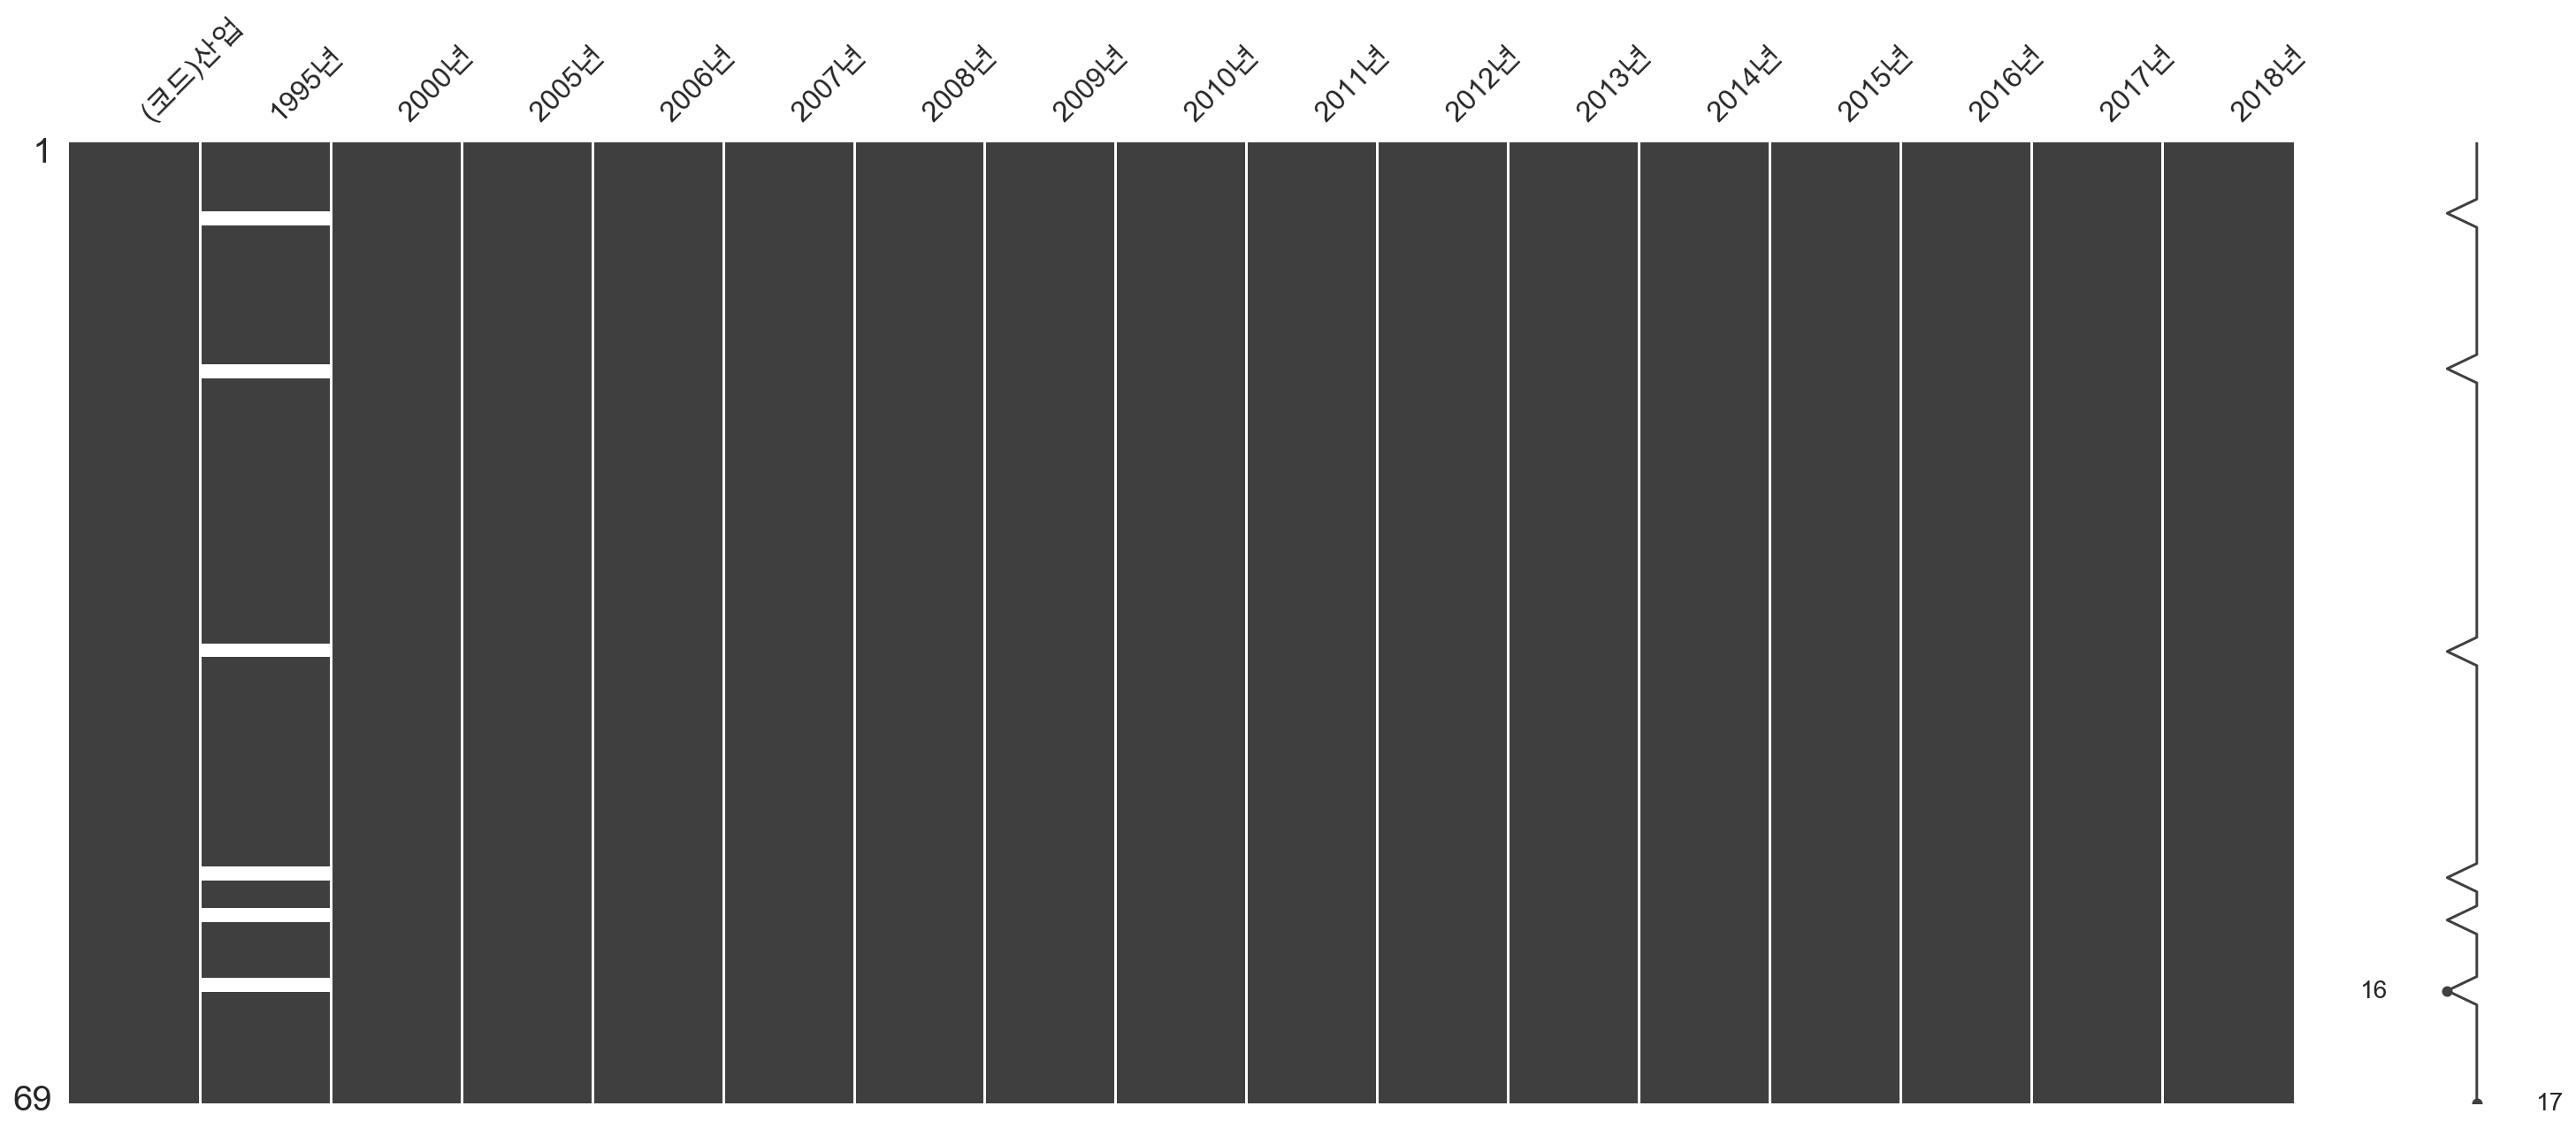

In [10]:
# NaN data 확인
msno.matrix(market_size_raw)

<AxesSubplot:>

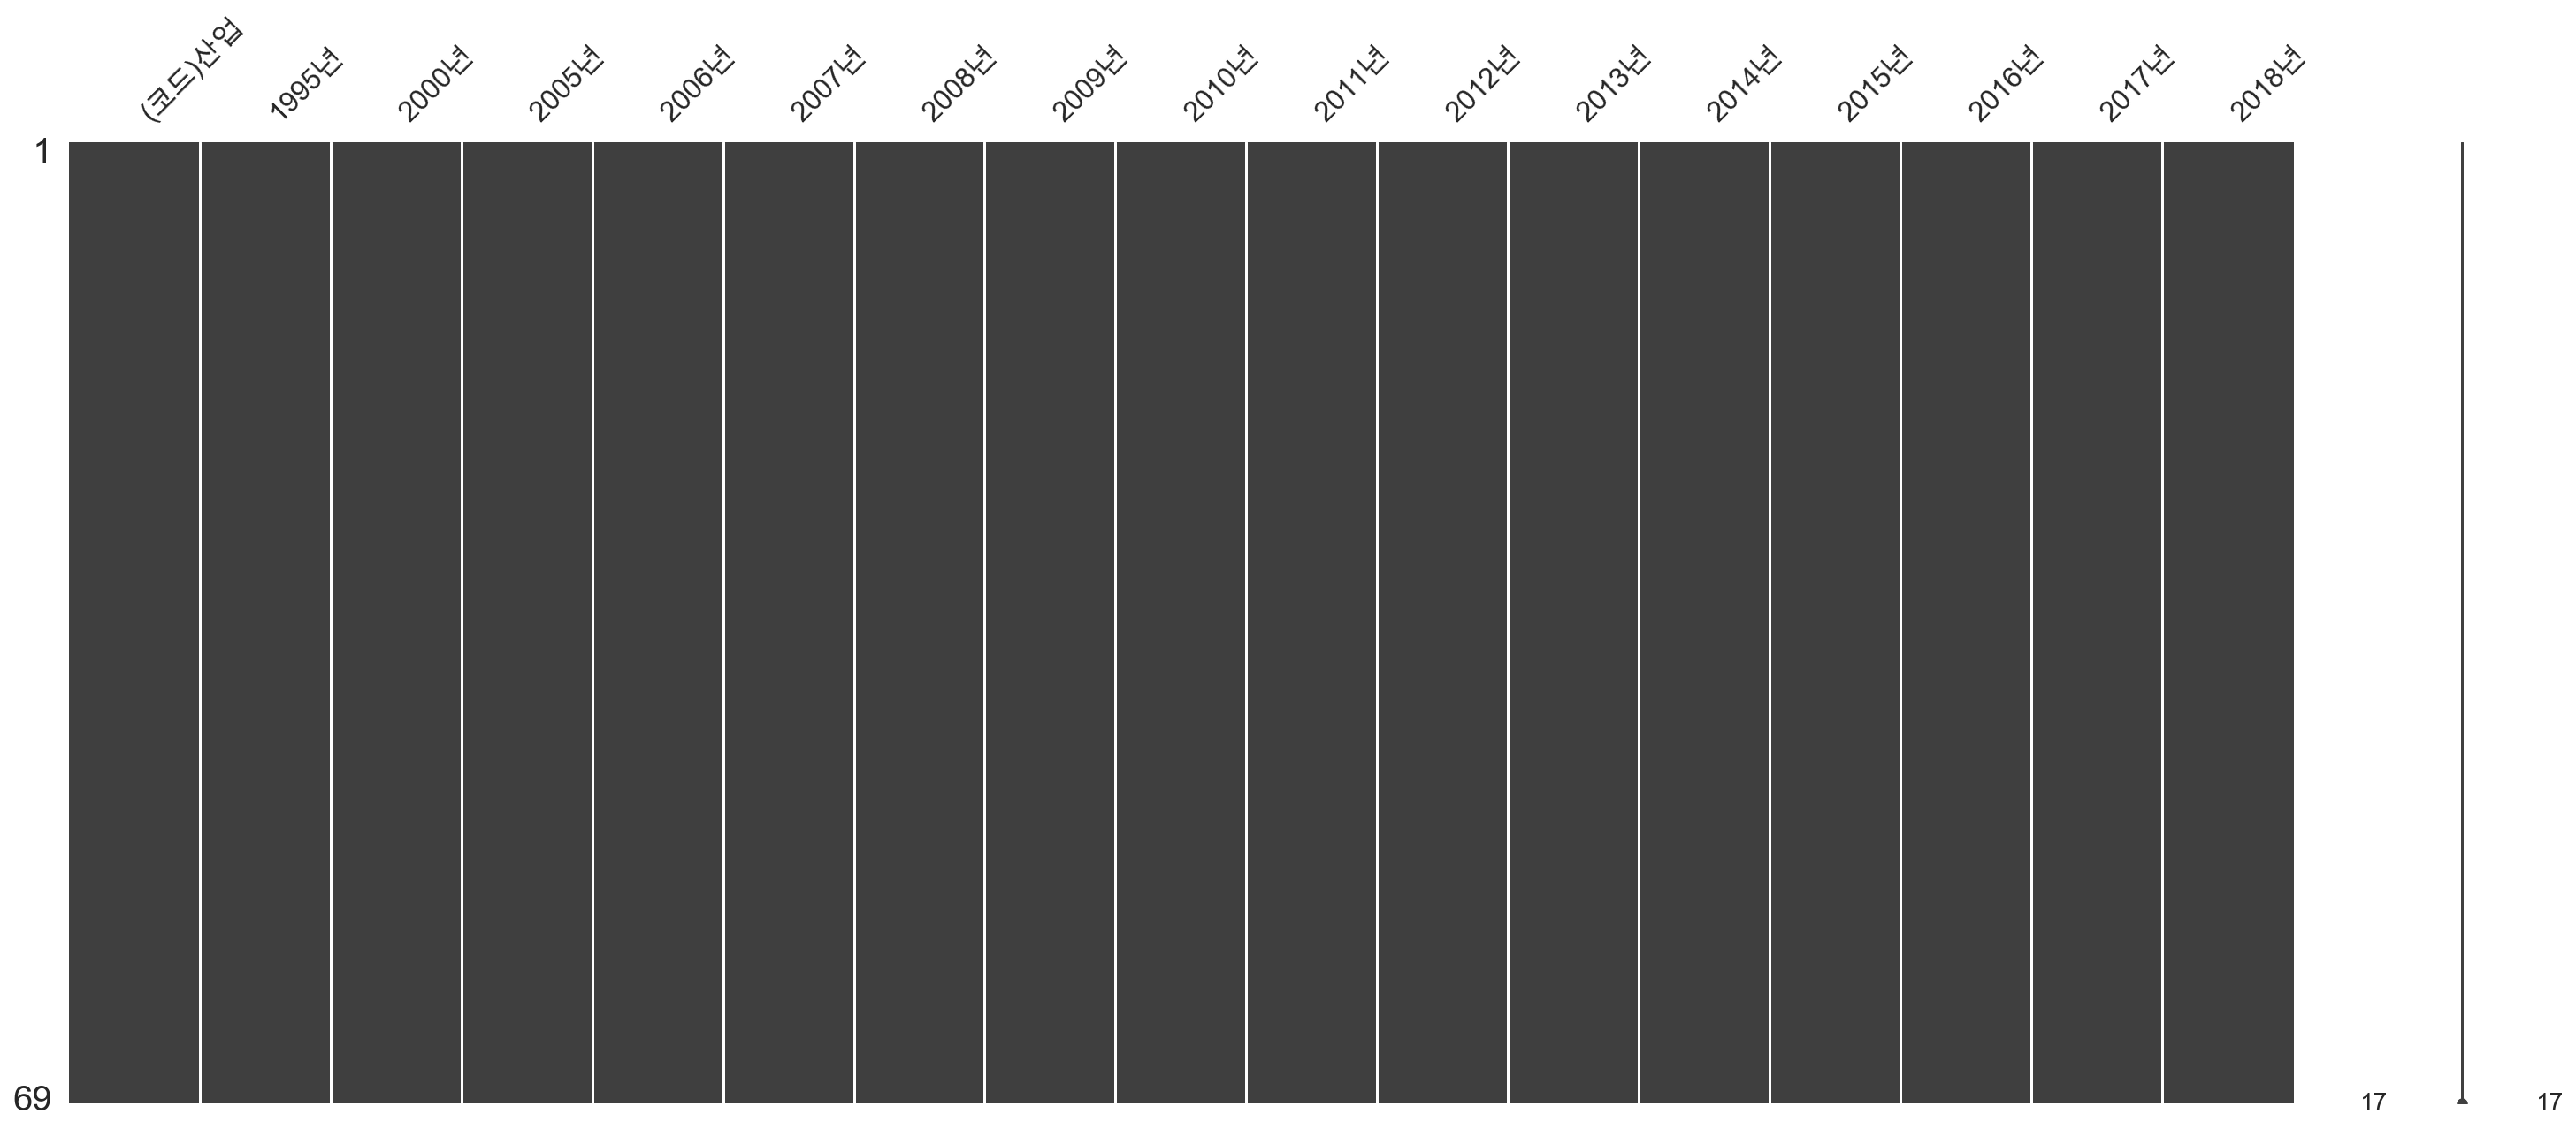

In [11]:
# NaN data = 0 입력
market_size_raw.fillna(value=0, inplace=True)
msno.matrix(market_size_raw)

In [12]:
market_size_raw['(코드)산업']

0           (0001)전산업
1          (0002)농림어업
2            (0003)광업
3           (0004)제조업
4        (0005)전기가스수도
           ...       
64        (2304)의료·보건
65         (2305)사회복지
66       (2401)숙박·음식점
67    (2402)예술·스포츠·여가
68       (2403)기타 서비스
Name: (코드)산업, Length: 69, dtype: object

In [13]:
# (코드)산업 행 : 
## 1. '('삭제 
market_size_raw['(코드)산업'] = market_size_raw['(코드)산업'].str.replace('(','')
## 2. 코드 - 산업 컬럼 분리
code_ind = market_size_raw['(코드)산업'].str.split(')')
market_size_raw['코드'] = code_ind.str.get(0)
market_size_raw['산업'] = code_ind.str.get(1)
market_size_raw.head()

/Users/ww/miniconda3/envs/dss_01/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,(코드)산업,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,코드,산업
0,0001)전산업,855409035.0,1.395750e+09,2.058129e+09,2.203890e+09,2.396508e+09,2.769841e+09,2.752651e+09,3.104104e+09,3.464008e+09,3.541314e+09,3.528272e+09,3.579923e+09,3.603501e+09,3.809136e+09,4.081292e+09,4.252328e+09,0001,전산업
1,0002)농림어업,36458912.0,4.312989e+07,4.943280e+07,5.019919e+07,5.200098e+07,5.929421e+07,6.055228e+07,6.280154e+07,6.765416e+07,6.898858e+07,6.844612e+07,6.818887e+07,7.221898e+07,7.076652e+07,7.204786e+07,7.339943e+07,0002,농림어업
2,0003)광업,16140974.0,4.261716e+07,6.831587e+07,8.324459e+07,8.743566e+07,1.468055e+08,1.122243e+08,1.344409e+08,1.858221e+08,1.947890e+08,1.795889e+08,1.682904e+08,1.123865e+08,9.442764e+07,1.241617e+08,1.541998e+08,0003,광업
3,0004)제조업,405402030.0,6.154948e+08,8.805226e+08,9.348485e+08,1.028049e+09,1.225082e+09,1.186703e+09,1.393742e+09,1.608548e+09,1.605810e+09,1.556811e+09,1.559629e+09,1.432693e+09,1.490319e+09,1.591960e+09,1.631825e+09,0004,제조업
4,0005)전기가스수도,15066111.0,3.150317e+07,4.642389e+07,5.128782e+07,5.522098e+07,6.507948e+07,6.480842e+07,7.583846e+07,8.533913e+07,9.927196e+07,1.057892e+08,1.084038e+08,9.463514e+07,9.361816e+07,9.636414e+07,1.037953e+08,0005,전기가스수도


In [14]:
## 3. (코드)산업 열 삭제
market_size_raw = market_size_raw.drop(['(코드)산업'], axis = 1)
market_size_raw.head()

,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,코드,산업
0,855409035.0,1.395750e+09,2.058129e+09,2.203890e+09,2.396508e+09,2.769841e+09,2.752651e+09,3.104104e+09,3.464008e+09,3.541314e+09,3.528272e+09,3.579923e+09,3.603501e+09,3.809136e+09,4.081292e+09,4.252328e+09,0001,전산업
1,36458912.0,4.312989e+07,4.943280e+07,5.019919e+07,5.200098e+07,5.929421e+07,6.055228e+07,6.280154e+07,6.765416e+07,6.898858e+07,6.844612e+07,6.818887e+07,7.221898e+07,7.076652e+07,7.204786e+07,7.339943e+07,0002,농림어업
2,16140974.0,4.261716e+07,6.831587e+07,8.324459e+07,8.743566e+07,1.468055e+08,1.122243e+08,1.344409e+08,1.858221e+08,1.947890e+08,1.795889e+08,1.682904e+08,1.123865e+08,9.442764e+07,1.241617e+08,1.541998e+08,0003,광업
3,405402030.0,6.154948e+08,8.805226e+08,9.348485e+08,1.028049e+09,1.225082e+09,1.186703e+09,1.393742e+09,1.608548e+09,1.605810e+09,1.556811e+09,1.559629e+09,1.432693e+09,1.490319e+09,1.591960e+09,1.631825e+09,0004,제조업
4,15066111.0,3.150317e+07,4.642389e+07,5.128782e+07,5.522098e+07,6.507948e+07,6.480842e+07,7.583846e+07,8.533913e+07,9.927196e+07,1.057892e+08,1.084038e+08,9.463514e+07,9.361816e+07,9.636414e+07,1.037953e+08,0005,전기가스수도


In [15]:
# 코드 행을 인덱스로 만들기
market_size_raw = market_size_raw.set_index('코드')
market_size_raw.head()

,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,산업
코드,,,,,,,,,,,,,,,,,
0001,855409035.0,1.395750e+09,2.058129e+09,2.203890e+09,2.396508e+09,2.769841e+09,2.752651e+09,3.104104e+09,3.464008e+09,3.541314e+09,3.528272e+09,3.579923e+09,3.603501e+09,3.809136e+09,4.081292e+09,4.252328e+09,전산업
0002,36458912.0,4.312989e+07,4.943280e+07,5.019919e+07,5.200098e+07,5.929421e+07,6.055228e+07,6.280154e+07,6.765416e+07,6.898858e+07,6.844612e+07,6.818887e+07,7.221898e+07,7.076652e+07,7.204786e+07,7.339943e+07,농림어업
0003,16140974.0,4.261716e+07,6.831587e+07,8.324459e+07,8.743566e+07,1.468055e+08,1.122243e+08,1.344409e+08,1.858221e+08,1.947890e+08,1.795889e+08,1.682904e+08,1.123865e+08,9.442764e+07,1.241617e+08,1.541998e+08,광업
0004,405402030.0,6.154948e+08,8.805226e+08,9.348485e+08,1.028049e+09,1.225082e+09,1.186703e+09,1.393742e+09,1.608548e+09,1.605810e+09,1.556811e+09,1.559629e+09,1.432693e+09,1.490319e+09,1.591960e+09,1.631825e+09,제조업
0005,15066111.0,3.150317e+07,4.642389e+07,5.128782e+07,5.522098e+07,6.507948e+07,6.480842e+07,7.583846e+07,8.533913e+07,9.927196e+07,1.057892e+08,1.084038e+08,9.463514e+07,9.361816e+07,9.636414e+07,1.037953e+08,전기가스수도


In [16]:
# 분류기준에 맞추어 항목 정리
market_size_raw.set_index(['산업'], inplace=True)
market_size_raw.head()

,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년
산업,,,,,,,,,,,,,,,,
전산업,855409035.0,1.395750e+09,2.058129e+09,2.203890e+09,2.396508e+09,2.769841e+09,2.752651e+09,3.104104e+09,3.464008e+09,3.541314e+09,3.528272e+09,3.579923e+09,3.603501e+09,3.809136e+09,4.081292e+09,4.252328e+09
농림어업,36458912.0,4.312989e+07,4.943280e+07,5.019919e+07,5.200098e+07,5.929421e+07,6.055228e+07,6.280154e+07,6.765416e+07,6.898858e+07,6.844612e+07,6.818887e+07,7.221898e+07,7.076652e+07,7.204786e+07,7.339943e+07
광업,16140974.0,4.261716e+07,6.831587e+07,8.324459e+07,8.743566e+07,1.468055e+08,1.122243e+08,1.344409e+08,1.858221e+08,1.947890e+08,1.795889e+08,1.682904e+08,1.123865e+08,9.442764e+07,1.241617e+08,1.541998e+08
제조업,405402030.0,6.154948e+08,8.805226e+08,9.348485e+08,1.028049e+09,1.225082e+09,1.186703e+09,1.393742e+09,1.608548e+09,1.605810e+09,1.556811e+09,1.559629e+09,1.432693e+09,1.490319e+09,1.591960e+09,1.631825e+09
전기가스수도,15066111.0,3.150317e+07,4.642389e+07,5.128782e+07,5.522098e+07,6.507948e+07,6.480842e+07,7.583846e+07,8.533913e+07,9.927196e+07,1.057892e+08,1.084038e+08,9.463514e+07,9.361816e+07,9.636414e+07,1.037953e+08


In [17]:
## 산업 분류 변경 1 : 이름 변경

market_size_raw.rename(index={
    '전산업':'전체', 
    '농림어업':'농업, 임업 및 어업', 
    '의약':'의약품', 
    '도·소매업':'유통업', 
    '전기가스수도':'전기가스', 
    '건설':'건설업', 
    '운수·보관':'운수창고업',
    '정밀기기': '의료·정밀기기'}, inplace=True)
market_size_raw.head()

,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년
산업,,,,,,,,,,,,,,,,
전체,855409035.0,1.395750e+09,2.058129e+09,2.203890e+09,2.396508e+09,2.769841e+09,2.752651e+09,3.104104e+09,3.464008e+09,3.541314e+09,3.528272e+09,3.579923e+09,3.603501e+09,3.809136e+09,4.081292e+09,4.252328e+09
"농업, 임업 및 어업",36458912.0,4.312989e+07,4.943280e+07,5.019919e+07,5.200098e+07,5.929421e+07,6.055228e+07,6.280154e+07,6.765416e+07,6.898858e+07,6.844612e+07,6.818887e+07,7.221898e+07,7.076652e+07,7.204786e+07,7.339943e+07
광업,16140974.0,4.261716e+07,6.831587e+07,8.324459e+07,8.743566e+07,1.468055e+08,1.122243e+08,1.344409e+08,1.858221e+08,1.947890e+08,1.795889e+08,1.682904e+08,1.123865e+08,9.442764e+07,1.241617e+08,1.541998e+08
제조업,405402030.0,6.154948e+08,8.805226e+08,9.348485e+08,1.028049e+09,1.225082e+09,1.186703e+09,1.393742e+09,1.608548e+09,1.605810e+09,1.556811e+09,1.559629e+09,1.432693e+09,1.490319e+09,1.591960e+09,1.631825e+09
전기가스,15066111.0,3.150317e+07,4.642389e+07,5.128782e+07,5.522098e+07,6.507948e+07,6.480842e+07,7.583846e+07,8.533913e+07,9.927196e+07,1.057892e+08,1.084038e+08,9.463514e+07,9.361816e+07,9.636414e+07,1.037953e+08


In [18]:
# value data type(float) 확인
market_size_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 전체 to 기타 서비스
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1995년   69 non-null     float64
 1   2000년   69 non-null     float64
 2   2005년   69 non-null     float64
 3   2006년   69 non-null     float64
 4   2007년   69 non-null     float64
 5   2008년   69 non-null     float64
 6   2009년   69 non-null     float64
 7   2010년   69 non-null     float64
 8   2011년   69 non-null     float64
 9   2012년   69 non-null     float64
 10  2013년   69 non-null     float64
 11  2014년   69 non-null     float64
 12  2015년   69 non-null     float64
 13  2016년   69 non-null     float64
 14  2017년   69 non-null     float64
 15  2018년   69 non-null     float64
dtypes: float64(16)
memory usage: 9.2+ KB


In [19]:
# 행 - 열 전환
market_size = market_size_raw.transpose()
market_size.tail()

산업,전체,"농업, 임업 및 어업",광업,제조업,전기가스,폐수처리 및 자원재활용,건설업,서비스업,제조업,의약품,...,전문·과학기술,사업시설관리서비스,사업지원,공공행정,교육,의료·보건,사회복지,숙박·음식점,예술·스포츠·여가,기타 서비스
2014년,3.579923e+09,68188869.0,168290439.0,1.559629e+09,108403818.0,18064751.0,193740601.0,1.463605e+09,1.559629e+09,19571129.0,...,135496639.0,8801936.0,41816019.0,120215512.0,106804454.0,90190020.0,23212833.0,101563180.0,31295850.0,48382244.0
2015년,3.603501e+09,72218975.0,112386545.0,1.432693e+09,94635136.0,14879217.0,209591301.0,1.667097e+09,1.432693e+09,20742424.0,...,192969566.0,13639970.0,44762438.0,120292973.0,118433363.0,98587837.0,24993913.0,131581004.0,39240347.0,55884784.0
2016년,3.809136e+09,70766518.0,94427643.0,1.490319e+09,93618157.0,15441213.0,246913064.0,1.797650e+09,1.490319e+09,23866647.0,...,202088976.0,13939471.0,46391439.0,129925235.0,119910335.0,104149075.0,28543812.0,152382377.0,46602005.0,59819920.0
2017년,4.081292e+09,72047857.0,124161708.0,1.591960e+09,96364137.0,17755282.0,273884361.0,1.905119e+09,1.591960e+09,24926590.0,...,213199125.0,15441508.0,50110053.0,139208222.0,123032795.0,115224831.0,29044211.0,163495273.0,49592384.0,61561001.0
2018년,4.252328e+09,73399431.0,154199770.0,1.631825e+09,103795286.0,18485481.0,271578216.0,1.999045e+09,1.631825e+09,26687523.0,...,227881966.0,16354232.0,51379300.0,147322579.0,126356143.0,123518851.0,32700766.0,173902442.0,53733212.0,62895868.0


In [20]:
len(market_size.columns)

69

In [21]:
## 산업 분류 변경 2 : 합치기
market_size['음식료품'] = market_size['음식료'] + market_size['담배']
market_size['섬유의복'] = market_size['섬유'] + market_size['의류'] + market_size['가죽·신발']
market_size['종이·목재'] = market_size['목재'] + market_size['제지']
market_size['화학'] = market_size['석유화학'] + market_size['정밀화학'] + market_size['석유정제'] + market_size['고무'] + market_size['플라스틱']
market_size['비금속광물'] = market_size['유리'] + market_size['세라믹'] + market_size['시멘트'] + market_size['기타 비금속 광물']
market_size['철강금속'] = market_size['철강'] + market_size['비철금속'] + market_size['주조'] + market_size['조립금속']
market_size['기계'] = market_size['일반목적기계'] + market_size['특수목적기계']
market_size['전기전자'] = market_size['반도체'] + market_size['디스플레이'] + market_size['컴퓨터'] + market_size['통신기기'] + market_size['가전'] + market_size['전지'] + market_size['기타 전자부품']
market_size['운수장비'] = market_size['항공'] + market_size['자동차'] + market_size['철도'] + market_size['기타 수송장비'] + market_size['조선']
market_size['기타제조업'] = market_size['기타 제조업'] + market_size['인쇄'] + market_size['가구']
market_size['통신업'] = market_size['방송'] + market_size['통신']
market_size['기타 서비스업'] = market_size['폐수처리 및 자원재활용'] + market_size['출판'] + market_size['정보'] + market_size['금융·보험'] + market_size['부동산'] + market_size['임대'] + market_size['전문·과학기술'] + market_size['사업시설관리서비스'] + market_size['사업지원'] + market_size['공공행정'] + market_size['교육']+ market_size['의료·보건'] + market_size['사회복지'] + market_size['숙박·음식점'] + market_size['예술·스포츠·여가'] + market_size['기타 서비스']

In [22]:
len(market_size.columns)

81

In [23]:
market_size.tail()

산업,전체,"농업, 임업 및 어업",광업,제조업,전기가스,폐수처리 및 자원재활용,건설업,서비스업,제조업,의약품,...,종이·목재,화학,비금속광물,철강금속,기계,전기전자,운수장비,기타제조업,통신업,기타 서비스업
2014년,3.579923e+09,68188869.0,168290439.0,1.559629e+09,108403818.0,18064751.0,193740601.0,1.463605e+09,1.559629e+09,19571129.0,...,34944101.0,351782053.0,44205427.0,298948927.0,112413825.0,183113139.0,145679489.0,79889849.0,55137493.0,1.094059e+09
2015년,3.603501e+09,72218975.0,112386545.0,1.432693e+09,94635136.0,14879217.0,209591301.0,1.667097e+09,1.432693e+09,20742424.0,...,36446985.0,274323656.0,43170744.0,220952150.0,113820772.0,171393989.0,149645464.0,100866657.0,52342019.0,1.281748e+09
2016년,3.809136e+09,70766518.0,94427643.0,1.490319e+09,93618157.0,15441213.0,246913064.0,1.797650e+09,1.490319e+09,23866647.0,...,37801797.0,288449049.0,45537266.0,217430716.0,115536795.0,175277817.0,161532578.0,103240208.0,55427622.0,1.392003e+09
2017년,4.081292e+09,72047857.0,124161708.0,1.591960e+09,96364137.0,17755282.0,273884361.0,1.905119e+09,1.591960e+09,24926590.0,...,39111026.0,316786301.0,46954655.0,236448937.0,143541228.0,185943216.0,156432228.0,107970384.0,56478224.0,1.485294e+09
2018년,4.252328e+09,73399431.0,154199770.0,1.631825e+09,103795286.0,18485481.0,271578216.0,1.999045e+09,1.631825e+09,26687523.0,...,40483790.0,348235761.0,46229126.0,237624145.0,135137029.0,179858321.0,157048425.0,112805829.0,56587930.0,1.569248e+09


In [24]:
market_size['전기전자']

1995년     39041309.0
2000년     96372219.0
2005년    102760372.0
2006년    106575734.0
2007년    108678144.0
2008년    123843348.0
2009년    140067824.0
2010년    166994724.0
2011년    192298177.0
2012년    186498423.0
2013년    177195647.0
2014년    183113139.0
2015년    171393989.0
2016년    175277817.0
2017년    185943216.0
2018년    179858321.0
Name: 전기전자, dtype: float64

In [25]:
## 산업 분류 변경 3 : 삭제하기

market_size.drop(['음식료', '담배', '섬유', '의류', '가죽·신발', '목재', '제지', '석유화학', '정밀화학', '석유정제', 
                      '고무', '플라스틱', '유리', '세라믹', '시멘트', '기타 비금속 광물', '철강', '비철금속', '주조', 
                      '조립금속', '일반목적기계', '특수목적기계', '반도체', '디스플레이', '컴퓨터', '통신기기', '가전',
                      '전지', '기타 전자부품', '항공', '자동차', '철도', '기타 수송장비', '조선', '기타 제조업', '인쇄',
                      '가구', '방송', '통신', '폐수처리 및 자원재활용', '출판', '정보', '금융·보험', '부동산', '임대', '전문·과학기술', '사업시설관리서비스',
                      '사업지원', '공공행정', '교육', '의료·보건', '사회복지', '숙박·음식점', '예술·스포츠·여가', '기타 서비스'
                     ], axis = 1, inplace=True)

In [26]:
market_size.tail()

산업,전체,"농업, 임업 및 어업",광업,제조업,전기가스,건설업,서비스업,제조업,의약품,의료·정밀기기,...,종이·목재,화학,비금속광물,철강금속,기계,전기전자,운수장비,기타제조업,통신업,기타 서비스업
2014년,3.579923e+09,68188869.0,168290439.0,1.559629e+09,108403818.0,193740601.0,1.463605e+09,1.559629e+09,19571129.0,34449492.0,...,34944101.0,351782053.0,44205427.0,298948927.0,112413825.0,183113139.0,145679489.0,79889849.0,55137493.0,1.094059e+09
2015년,3.603501e+09,72218975.0,112386545.0,1.432693e+09,94635136.0,209591301.0,1.667097e+09,1.432693e+09,20742424.0,36089188.0,...,36446985.0,274323656.0,43170744.0,220952150.0,113820772.0,171393989.0,149645464.0,100866657.0,52342019.0,1.281748e+09
2016년,3.809136e+09,70766518.0,94427643.0,1.490319e+09,93618157.0,246913064.0,1.797650e+09,1.490319e+09,23866647.0,38937310.0,...,37801797.0,288449049.0,45537266.0,217430716.0,115536795.0,175277817.0,161532578.0,103240208.0,55427622.0,1.392003e+09
2017년,4.081292e+09,72047857.0,124161708.0,1.591960e+09,96364137.0,273884361.0,1.905119e+09,1.591960e+09,24926590.0,45367842.0,...,39111026.0,316786301.0,46954655.0,236448937.0,143541228.0,185943216.0,156432228.0,107970384.0,56478224.0,1.485294e+09
2018년,4.252328e+09,73399431.0,154199770.0,1.631825e+09,103795286.0,271578216.0,1.999045e+09,1.631825e+09,26687523.0,48515979.0,...,40483790.0,348235761.0,46229126.0,237624145.0,135137029.0,179858321.0,157048425.0,112805829.0,56587930.0,1.569248e+09


In [27]:
len(market_size.columns)

26

In [28]:
list(market_size.columns)

['전체',
 '농업, 임업 및 어업',
 '광업',
 '제조업',
 '전기가스',
 '건설업',
 '서비스업',
 '제조업',
 '의약품',
 '의료·정밀기기',
 '전기기기',
 '서비스업',
 '유통업',
 '운수창고업',
 '음식료품',
 '섬유의복',
 '종이·목재',
 '화학',
 '비금속광물',
 '철강금속',
 '기계',
 '전기전자',
 '운수장비',
 '기타제조업',
 '통신업',
 '기타 서비스업']

In [40]:
market_size_sorted = market_size[['전체', '농업, 임업 및 어업', '광업', '제조업', '음식료품', '섬유의복', '종이·목재', '화학', '의약품', '비금속광물', '철강금속', '기계', '전기전자', '의료·정밀기기', '운수장비', '기타제조업', '유통업', '전기가스', '건설업', '운수창고업', '통신업', '서비스업']].astype(int)
market_size_sorted

산업,전체,"농업, 임업 및 어업",광업,제조업,제조업,음식료품,섬유의복,종이·목재,화학,의약품,...,의료·정밀기기,운수장비,기타제조업,유통업,전기가스,건설업,운수창고업,통신업,서비스업,서비스업
1995년,855409035,36458912,16140974,405402030,405402030,45251141,24435419,15656250,71277023,6503760,...,9157463,42450939,15363681,45502015,15066111,82463374,26937314,11866977,299877634,299877634
2000년,1395749584,43129888,42617160,615494763,615494763,64908591,31818011,18857271,131588294,8389327,...,13769776,51871842,19552690,63438550,31503172,99096907,38500237,34293059,563907694,563907694
2005년,2058128879,49432802,68315871,880522626,880522626,79535183,38003300,21321430,195208733,13498180,...,19962838,82960902,21493605,97736514,46423892,150470135,66573882,49758735,862963553,862963553
2006년,2203889676,50199190,83244590,934848521,934848521,81320664,40449057,22351929,209121677,14843966,...,20897194,91303492,23708033,103313050,51287821,153315180,67420864,51908740,930994374,930994374
2007년,2396507678,52000980,87435664,1028049070,1028049070,86278270,41480050,23897517,230778186,16250727,...,21258208,101794862,25517899,110410927,55220980,166693235,75036247,54934214,1007107749,1007107749
2008년,2769841236,59294211,146805534,1225082005,1225082005,99796689,43961104,27746856,293333697,18102780,...,22954088,106017332,26086083,117145749,65079483,180679909,89434916,57022283,1092900094,1092900094
2009년,2752650935,60552281,112224299,1186702760,1186702760,105057695,45204448,27480136,259758087,19411109,...,22347298,105630014,27307321,125083831,64808425,188031835,83960256,58427274,1140331335,1140331335
2010년,3104104141,62801536,134440937,1393742435,1393742435,96498424,59188543,30836477,295477067,17473461,...,29661783,118720812,65558537,186526878,75838458,179833579,107614972,51063831,1240962532,1240962532
2011년,3464007891,67654165,185822052,1608547923,1608547923,106827199,68906861,32946584,358134311,18026178,...,34950765,137576445,72788709,204760988,85339132,181179685,110500343,51869630,1317904147,1317904147
2012년,3541314391,68988576,194789041,1605810494,1605810494,109223943,73774972,32255155,375166051,18694391,...,36237988,139151855,70341190,211376585,99271960,180753440,111897873,53151679,1374710844,1374710844


In [41]:
len(market_size_sorted.columns)

24

In [42]:
list(market_size_sorted.columns)

['전체',
 '농업, 임업 및 어업',
 '광업',
 '제조업',
 '제조업',
 '음식료품',
 '섬유의복',
 '종이·목재',
 '화학',
 '의약품',
 '비금속광물',
 '철강금속',
 '기계',
 '전기전자',
 '의료·정밀기기',
 '운수장비',
 '기타제조업',
 '유통업',
 '전기가스',
 '건설업',
 '운수창고업',
 '통신업',
 '서비스업',
 '서비스업']

In [46]:
# 중복 확인
market_size_sorted.transpose().index.duplicated()

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True])

In [50]:
# 중복 삭제
market_size_sorted_trans = market_size_sorted.transpose()
market_size_final = market_size_sorted_trans.drop_duplicates().head()

In [51]:
market_size_final.head()

,1995년,2000년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년
산업,,,,,,,,,,,,,,,,
전체,855409035,1395749584,2058128879,2203889676,2396507678,2769841236,2752650935,3104104141,3464007891,3541314391,3528271720,3579923048,3603500766,3809135923,4081292159,4252327674
"농업, 임업 및 어업",36458912,43129888,49432802,50199190,52000980,59294211,60552281,62801536,67654165,68988576,68446124,68188869,72218975,70766518,72047857,73399431
광업,16140974,42617160,68315871,83244590,87435664,146805534,112224299,134440937,185822052,194789041,179588875,168290439,112386545,94427643,124161708,154199770
제조업,405402030,615494763,880522626,934848521,1028049070,1225082005,1186702760,1393742435,1608547923,1605810494,1556810694,1559629457,1432692898,1490319219,1591959873,1631824545
음식료품,45251141,64908591,79535183,81320664,86278270,99796689,105057695,96498424,106827199,109223943,115878449,121690554,126109855,140484293,146365975,152463174
